<a href="https://colab.research.google.com/github/riyasachdeva04/open-cv/blob/main/image_enhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

image enhancement

In [3]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
%matplotlib inline
from IPython.display import Image

In [4]:
from google.colab import files
uploaded = files.upload()

Saving checkerboard_color.png to checkerboard_color.png
Saving circle.jpg to circle.jpg
Saving coca-cola-logo.png to coca-cola-logo.png


In [9]:
from google.colab import files
uploaded = files.upload()

Saving New_Zealand_Coast.jpg to New_Zealand_Coast.jpg


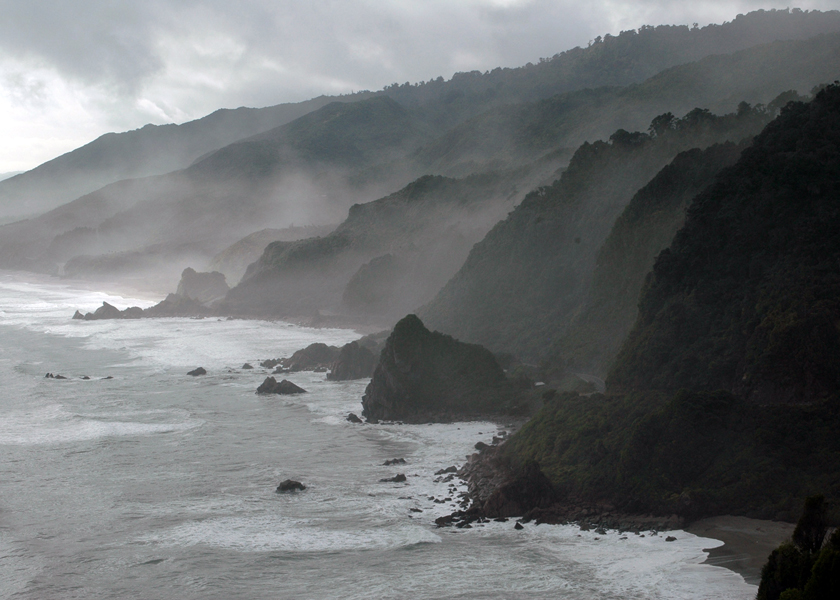

In [12]:
img_bgr = cv2.imread('New_Zealand_Coast.jpg', cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

#Display 18X18 img
Image('New_Zealand_Coast.jpg')

addition(brightness)

Text(0.5, 1.0, 'Brighter')

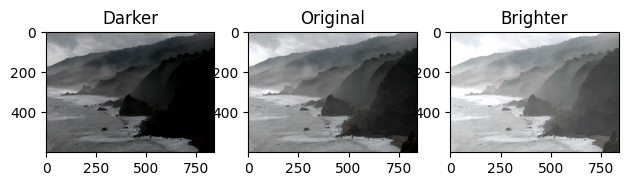

In [22]:
matrix = np.ones(img_rgb.shape, dtype = 'uint8') * 50
img_brighter = cv2.add(img_rgb, matrix)
img_darker = cv2.subtract(img_rgb, matrix)

#display
plt.figure(figsize = [10, 6])
plt.subplot(141); plt.imshow(img_darker); plt.title('Darker')
plt.subplot(142); plt.imshow(img_rgb); plt.title('Original')
plt.subplot(143); plt.imshow(img_brighter); plt.title('Brighter')


multiplication(contrast)

Text(0.5, 1.0, 'Brighter')

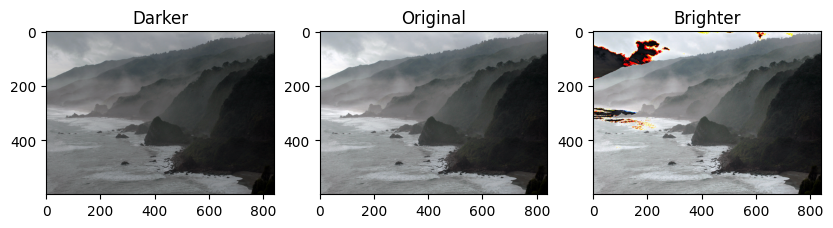

In [25]:
matrix1 = np.ones(img_rgb.shape) * .8
matrix2 = np.ones(img_rgb.shape) * 1.2

img_rgb_darker = np.uint8(cv2.multiply(np.float64(img_rgb), matrix1))
img_rgb_brighter = np.uint8(cv2.multiply(np.float64(img_rgb), matrix2))


plt.figure(figsize = [10, 6])
plt.subplot(131); plt.imshow(img_rgb_darker); plt.title('Darker');
plt.subplot(132); plt.imshow(img_rgb); plt.title('Original');
plt.subplot(133); plt.imshow(img_rgb_brighter); plt.title('Brighter')

handling overflow using np.clip

Text(0.5, 1.0, 'Brighter')

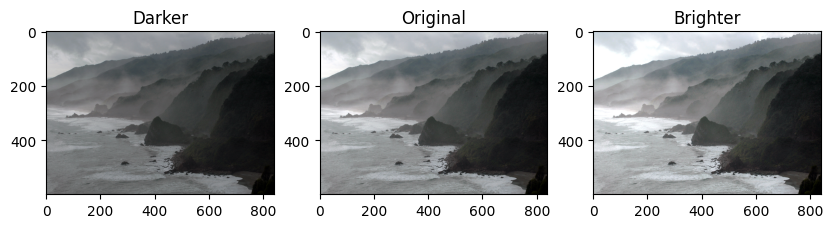

In [28]:
matrix1 = np.ones(img_rgb.shape) * .8
matrix2 = np.ones(img_rgb.shape) * 1.2

img_rgb_darker = np.uint8(cv2.multiply(np.float64(img_rgb), matrix1))
img_rgb_brighter = np.uint8(np.clip((cv2.multiply(np.float64(img_rgb), matrix2)), 0, 255))


plt.figure(figsize = [10, 6])
plt.subplot(131); plt.imshow(img_rgb_darker); plt.title('Darker');
plt.subplot(132); plt.imshow(img_rgb); plt.title('Original');
plt.subplot(133); plt.imshow(img_rgb_brighter); plt.title('Brighter')

image thresholding: binary images from grayscale images

In [29]:
from google.colab import files
uploaded = files.upload()

Saving building-windows.jpg to building-windows.jpg


Original size: (572, 800)
Threshold size: (572, 800)


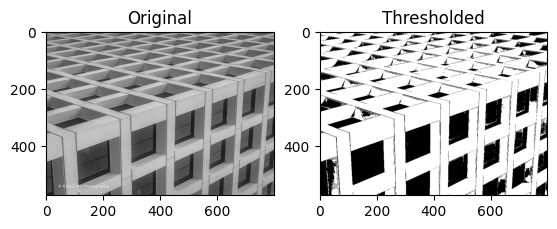

In [35]:
img_read = cv2.imread('building-windows.jpg', cv2.IMREAD_GRAYSCALE)
retval, img_thresh = cv2.threshold(img_read, 100, 255, cv2.THRESH_BINARY)

plt.figure(figsize = [10, 6])
plt.subplot(131); plt.imshow(img_read, cmap='gray'); plt.title('Original')
plt.subplot(132); plt.imshow(img_thresh, cmap='gray'); plt.title('Thresholded')
print('Original size:' , img_read.shape)
print('Threshold size:', img_thresh.shape)


sheet music reader

In [36]:
from google.colab import files
uploaded = files.upload()

Saving Piano_Sheet_Music.png to Piano_Sheet_Music.png
Saving rectangle.jpg to rectangle.jpg


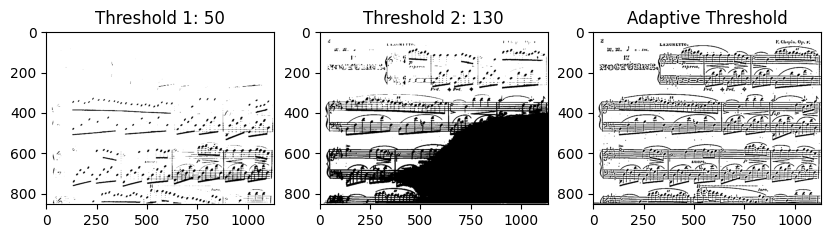

In [47]:
img_read = cv2.imread('Piano_Sheet_Music.png', cv2.IMREAD_GRAYSCALE)

retval, img_read_thresh1 = cv2.threshold(img_read, 50, 255, cv2.THRESH_BINARY)
retval, img_read_thresh2 = cv2.threshold(img_read, 130, 255, cv2.THRESH_BINARY)

#adaptive thresholding
img_thresh_adapt = cv2.adaptiveThreshold(img_read, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)

plt.figure(figsize = [10, 6])
plt.subplot(131); plt.imshow(img_read_thresh1, cmap = 'gray'); plt.title('Threshold 1: 50')
plt.subplot(132); plt.imshow(img_read_thresh2, cmap = 'gray'); plt.title('Threshold 2: 130');
plt.subplot(133); plt.imshow(img_thresh_adapt, cmap = 'gray'); plt.title('Adaptive Threshold');


bitwise operations

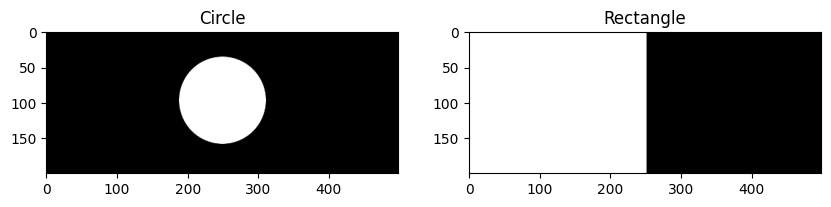

In [49]:
img_circle = cv2.imread('circle.jpg', cv2.IMREAD_GRAYSCALE)
img_rectangle = cv2.imread('rectangle.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize = [10, 6])
plt.subplot(121); plt.imshow(img_circle, cmap = 'gray'); plt.title('Circle');
plt.subplot(122); plt.imshow(img_rectangle, cmap = 'gray'); plt.title('Rectangle');

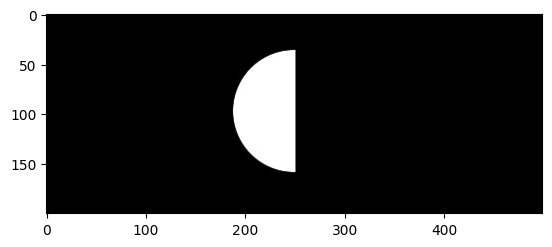

In [53]:
img_and = cv2.bitwise_and(img_circle, img_rectangle, mask= None)
plt.imshow(img_and, cmap = 'gray')

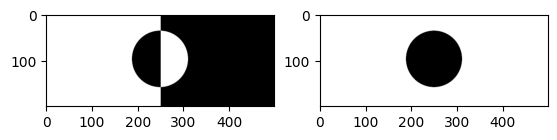

In [55]:
img_xor = cv2.bitwise_xor(img_circle, img_rectangle, mask= None)

img_not = cv2.bitwise_not(img_circle, mask= None)

plt.figure(figsize = [10, 6])
plt.subplot(131); plt.imshow(img_xor, cmap = 'gray')
plt.subplot(132); plt.imshow(img_not, cmap = 'gray')

logo manipulation

(700, 700, 3)


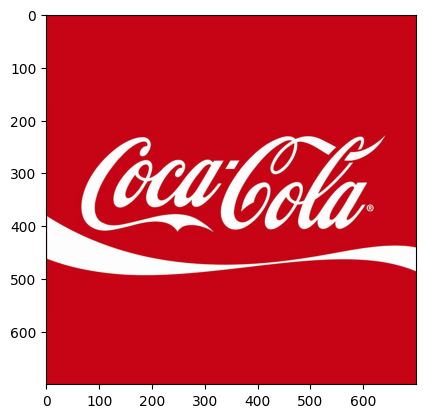

In [57]:
img_bgr = cv2.imread('coca-cola-logo.png')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
print(img_rgb.shape)

logo_w = img_rgb.shape[0]
logo_h = img_rgb.shape[1]

bg image(mantaining aspect ratio)

(700, 700, 3)


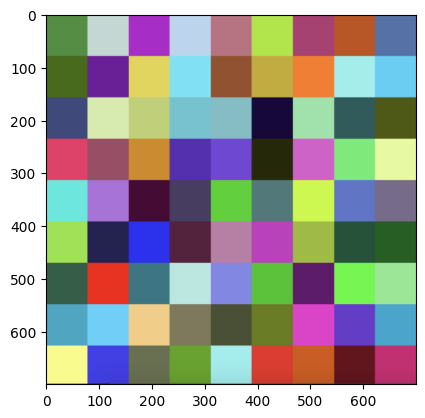

In [59]:
img_background_bgr = cv2.imread('checkerboard_color.png', cv2.IMREAD_COLOR)
img_background_rgb = cv2.cvtColor(img_background_bgr, cv2.COLOR_BGR2RGB)

aspect_ratio = logo_w / img_background_rgb.shape[0]
dim = (logo_w, int(aspect_ratio * img_background_rgb.shape[1]))

img_background_rgb = cv2.resize(img_background_rgb, dim, interpolation = cv2.INTER_AREA)
plt.imshow(img_background_rgb);
print(img_background_rgb.shape)


masking

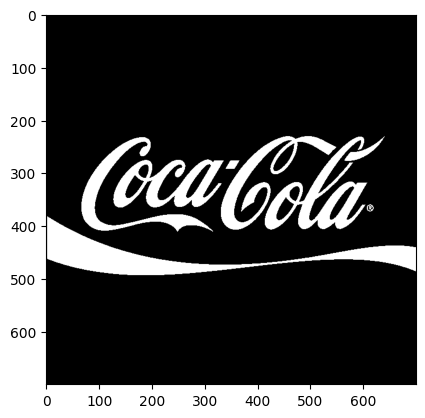

In [67]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

#binary thresholding to create a binary mask
retval, img_mask = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

plt.imshow(img_mask, cmap = 'gray')

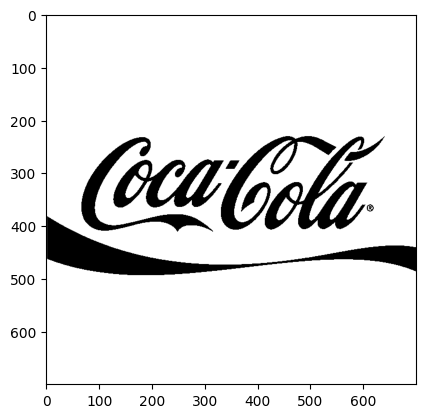

In [70]:
#inverting mask
img_mask_inverted = cv2.bitwise_not(img_mask, mask = None)
plt.imshow(img_mask_inverted, cmap = 'gray')

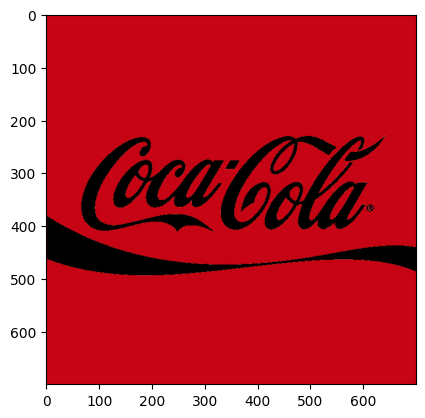

In [73]:
img_1 = cv2.bitwise_and(img_rgb, img_rgb, mask = img_mask_inverted)
plt.imshow(img_1)

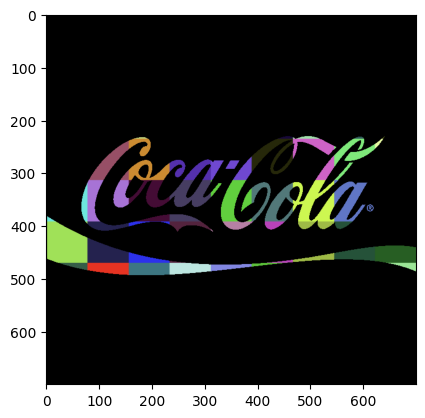

In [82]:
img_2 = cv2.bitwise_and(img_background_rgb, img_background_rgb, mask = img_mask)
plt.imshow(img_2)

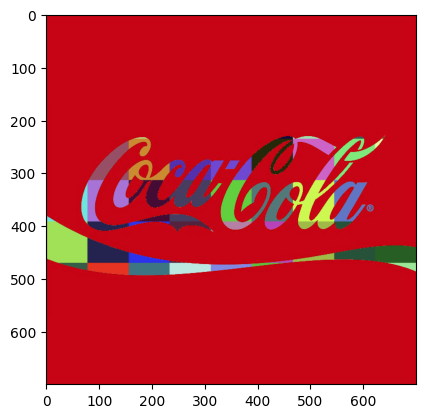

In [83]:
img_final = cv2.add(img_1, img_2)
plt.imshow(img_final)

tiet logo

In [85]:
from google.colab import files
uploaded = files.upload()

Saving 1000_F_241661052_z0NHP9UAQxkjudB3fLCMj7Dl9w6JWbXL.jpg to 1000_F_241661052_z0NHP9UAQxkjudB3fLCMj7Dl9w6JWbXL.jpg
Saving download.png to download (1).png


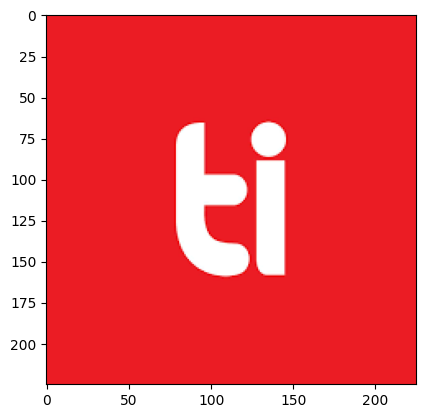

In [191]:
img_logo_bgr = cv2.imread('download (1).png', cv2.IMREAD_COLOR)
img_logo = cv2.cvtColor(img_logo_bgr, cv2.COLOR_BGR2RGB)
img_bg = cv2.imread('1000_F_241661052_z0NHP9UAQxkjudB3fLCMj7Dl9w6JWbXL.jpg', cv2.IMREAD_GRAYSCALE)

plt.imshow(img_logo)

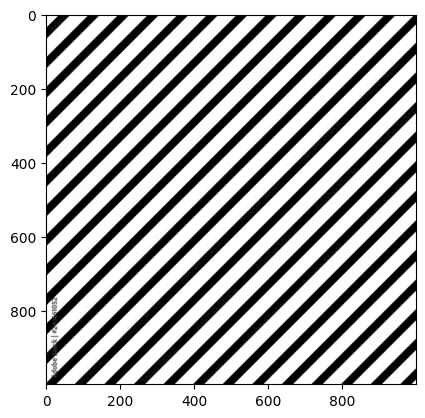

In [92]:
plt.imshow(img_bg, cmap = 'gray')

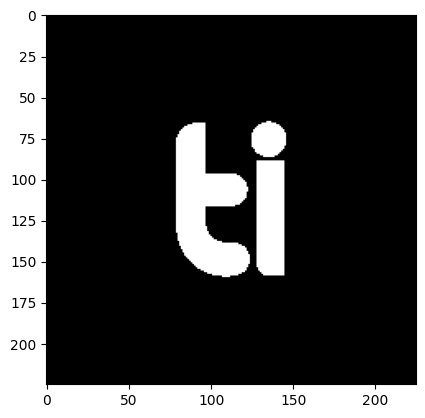

In [186]:
img_mask = cv2.cvtColor(img_logo, cv2.COLOR_RGB2GRAY)
retval, img_mask = cv2.threshold(img_mask, 132, 255, cv2.THRESH_BINARY)

plt.imshow(img_mask, cmap = 'gray')

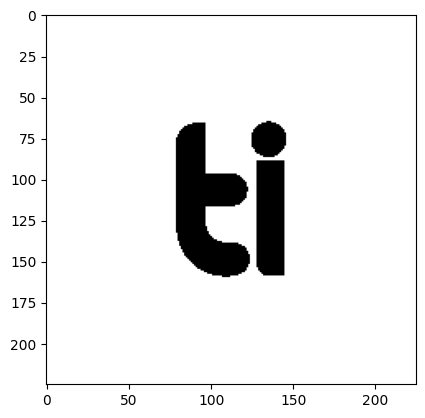

In [187]:
img_mask_inverted = cv2.bitwise_not(img_mask, mask = None)
plt.imshow(img_mask_inverted, cmap = 'gray')

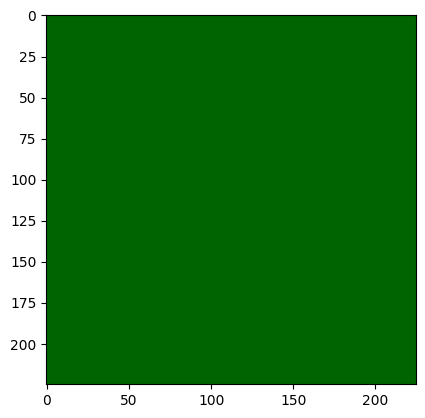

In [188]:
img_new = np.zeros((225, 225, 3), dtype = np.uint8)
matrix = np.ones((225, 225), dtype = np.uint8)*100
img_new[:, :, 1] = matrix[:, :]

plt.imshow(img_new)

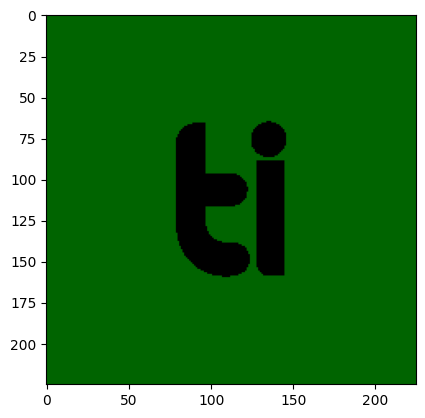

In [189]:
img_1 = cv2.bitwise_and(img_new, img_new, mask = img_mask_inverted)
plt.imshow(img_1)


In [192]:
print(img_mask.shape)
print(img_bg.shape)
aspect_ratio = img_mask.shape[0]/img_bg.shape[0]
dim = (img_mask.shape[0], int(aspect_ratio * img_bg.shape[1]))
img_bg = cv2.resize(img_bg, dim, interpolation = cv2.INTER_AREA)
print(img_bg.shape)

(225, 225)
(1000, 1000)
(225, 225)


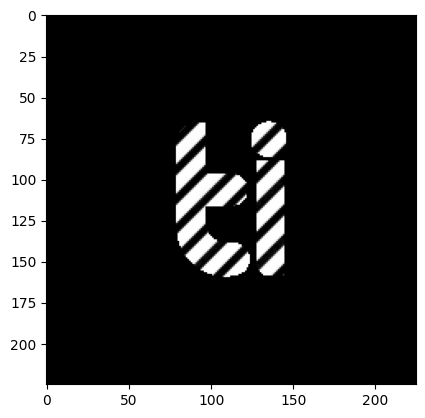

In [193]:
img_2 = cv2.bitwise_and(img_mask, img_bg, mask = None)
plt.imshow(img_2, cmap = 'gray')

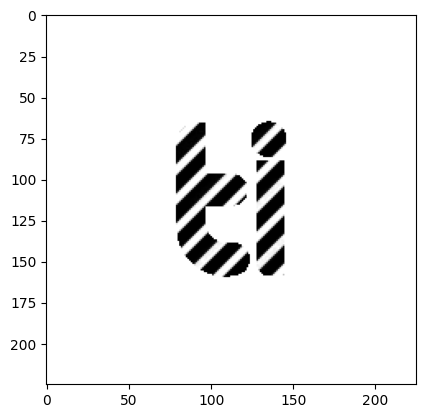

In [194]:
img_3 = cv2.bitwise_not(img_2, mask = None)
plt.imshow(img_3, cmap = 'gray')



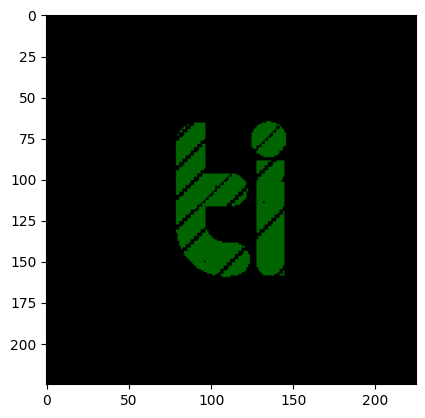

In [208]:
img_final = cv2.bitwise_and(img_new, img_new, mask = img_2)
plt.imshow(img_final)

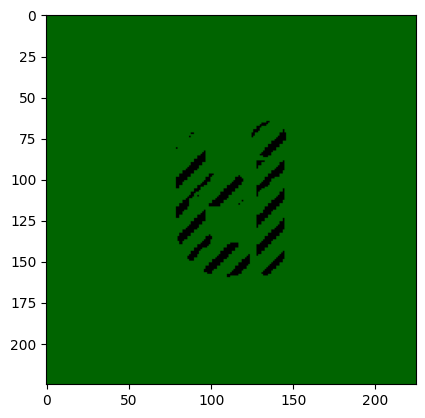

In [209]:
img_final = cv2.bitwise_and(img_new, img_new, mask = img_3)
plt.imshow(img_final)